In [28]:
import pandas as pd

df = pd.read_pickle('electronika_clean.pkl')
df

,Unnamed: 0,Order_ID,Email_new,Phone_new,Source,OrderDate,время,месяц,ChangeDate,DeliveryDate,...,Quant,RowPrice,RowDiscount,RowSum,Brand,TN,TK,NomFullPath,Week,Nom_ID
0,10,1303000511_TT,556669108109_lm16@gmail.com,55574953-52525755535375,Онлайн-Резерв.,2016-03-01,10:46:45.000,201603,2016-03-05 09:16:49.000,2016-03-01 00:00:00.000,...,1,2970,0,2970,Ника,Товары для дома,Хозтовары,Техника для дома/Техника для ухода за одеждой/...,9,90364
1,12,1303000512_TT,556669108109_lm16@gmail.com,55574953-52525755535375,Онлайн-Резерв.,2016-03-01,10:47:19.000,201603,2016-03-01 10:59:43.000,2016-03-01 00:00:00.000,...,1,19490,0,19490,DeLonghi,Мелкая бытовая техника,Приготовление пищи,Техника для кухни/Приготовление пищи/Мультиварки/,9,45673
2,14,1303000513_TT,666668112117_pu19@ya.ru,55575655-50555350534877,Онлайн-Резерв.,2016-03-11,16:06:56.000,201603,2016-03-11 20:11:18.000,2016-03-12 00:00:00.000,...,1,19990,0,19990,Samsung,ТВ-Аудио,Телевизоры LCD,"Телевизоры, аудио, видео/Телевизоры/LED телеви...",10,120757
3,16,1303000514_TT,666668112117_pu19@ya.ru,55575653-57485657505272,Онлайн-Резерв.,2016-03-15,18:13:33.000,201603,2016-03-15 18:17:35.000,2016-03-22 00:00:00.000,...,1,23680,0,23680,СМК,Мебель,Мягкая мебель,Мебель/Мягкая мебель/Диваны/Трехместные диваны/,11,264580
4,28,1303000520_TT,56666668112117_pu26@yanded.ru,55575449-54535553535073,Онлайн-Резерв.,2016-03-01,00:01:46.000,201603,2016-03-04 15:09:38.000,2016-03-02 00:00:00.000,...,1,2420,0,2420,HP,Аксессуары,Картриджи и бумага,"Компьютеры, ноутбуки, планшеты/Оргтехника/Расх...",9,76102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183067,357019,5898089_BX,6666449117_1u9@bk.ru,55574957-51495048515075,Онлайн-Резерв.,2016-04-30,23:51:37.000,201604,2016-05-03 12:55:07.000,2016-05-02 00:00:00.000,...,1,899,0,899,Saturn,Климат,Вентиляторы бытовые,Техника для дома/Климатическая техника/Кондици...,17,38755
183068,357021,5898095_BX,666661118109_vm27@yahoo.com,55575452-55554849505278,Онлайн-Резерв.,2016-04-30,23:54:03.000,201604,2016-05-04 19:43:40.000,2016-05-07 00:00:00.000,...,1,1090,0,1090,Case Logic,Аксессуары,Аксессуары для фото/видео,Фото- и видеотехника/Аксессуары для фото и вид...,17,31908
183069,357023,5898099_BX,3110116_nt16@pisem.net,55574948-50554849554878,Онлайн-Резерв.,2016-04-30,23:56:02.000,201604,2016-05-01 11:57:42.000,2016-05-08 00:00:00.000,...,1,6859,0,6859,ELIKOR,Крупная бытовая техника,Встраиваемая техника,Встраиваемая техника/Вытяжки/,17,140459
183070,357024,5898102_BX,55666665102117_fu13@list.ru,55575648-51484956545071,Онлайн-Резерв.,2016-04-30,23:56:38.000,201604,2016-05-06 20:18:49.000,2016-05-05 00:00:00.000,...,1,9120,0,9120,FORWARD,Спорт и активный отдых,Велосипеды и аксессуары,Товары для спорта и отдыха/Велосипеды и аксесс...,17,295956


In [29]:
from prophet import Prophet
import matplotlib.pyplot as plt
import seaborn as sns

# Без учета акций

## Крупная бытовая техника

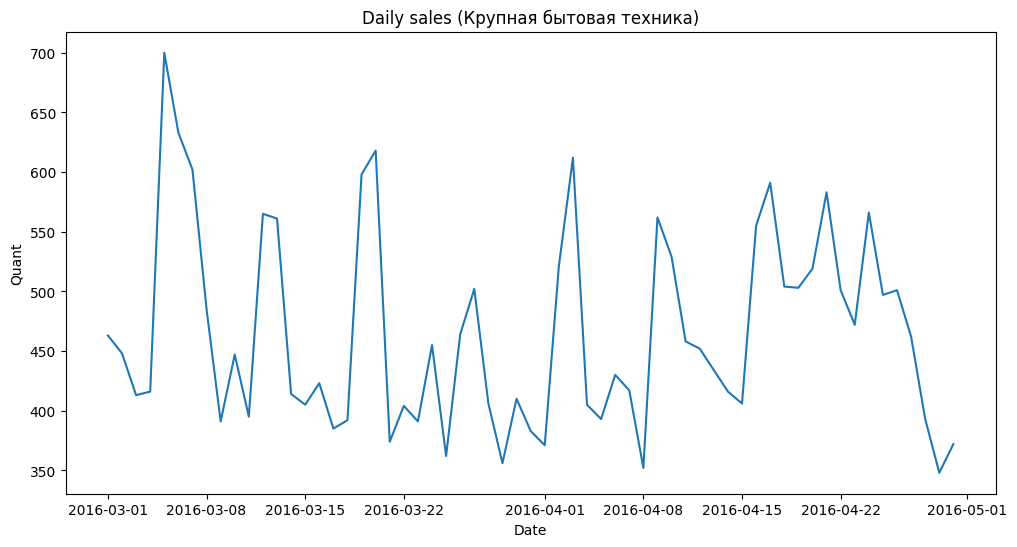

In [3]:
category_name = 'Крупная бытовая техника'
daily_sales = df[df['TN'] == f'{category_name}'][['OrderDate', 'Quant']]\
    .groupby('OrderDate').sum()\
    .resample('D').sum()
daily_sales.reset_index(inplace=True)
daily_sales.rename(columns={'OrderDate': 'ds', 'Quant': 'y'}, inplace=True)
daily_sales.sort_values(by='ds', inplace=True)

plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_sales, x='ds', y='y')
plt.title(f"Daily sales ({category_name})")
plt.xlabel("Date")
plt.ylabel("Quant")
plt.show()

08:30:29 - cmdstanpy - INFO - Chain [1] start processing
08:30:30 - cmdstanpy - INFO - Chain [1] done processing


,yhat,yhat_lower,yhat_upper,y
ds,,,,
2016-03-01,463.024664,415.879510,514.493965,463
2016-03-02,457.294524,407.608913,506.345403,448
2016-03-03,454.421517,397.472896,507.755966,413
2016-03-04,421.404738,371.010814,469.331956,416
2016-03-05,601.672954,556.544175,654.291017,700
...,...,...,...,...
2016-04-26,414.988107,366.191085,467.698918,501
2016-04-27,412.294545,362.424357,463.951372,462
2016-04-28,412.458115,365.626537,463.895090,393


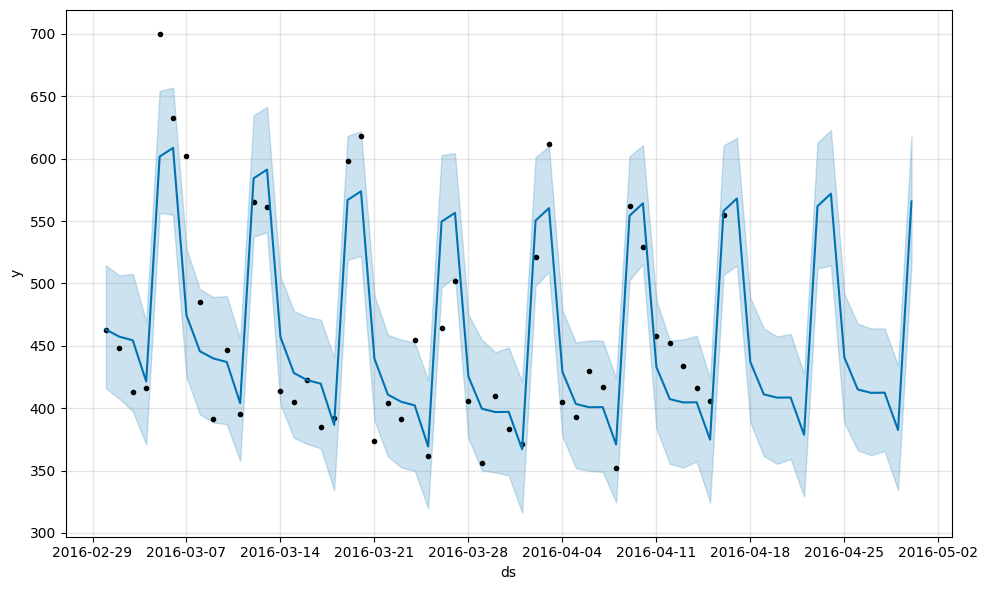

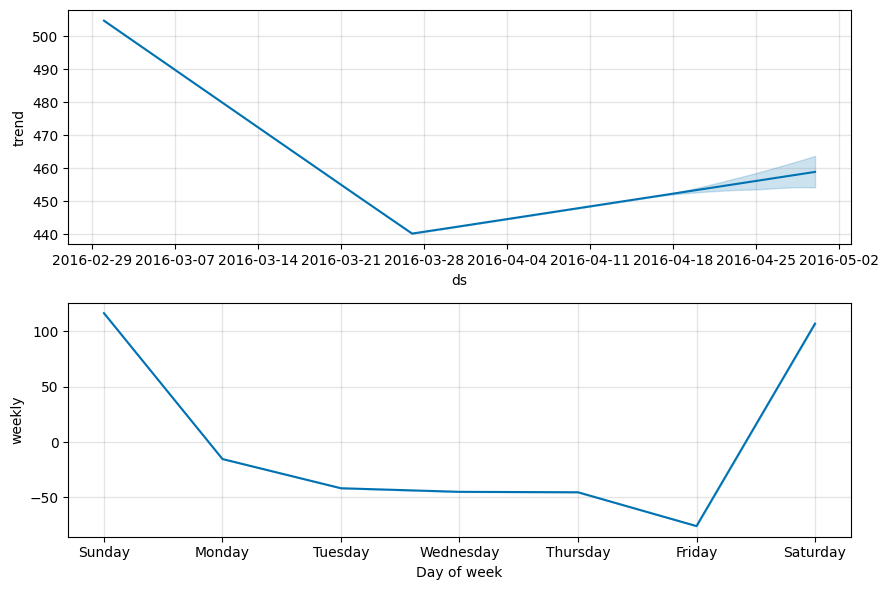

In [4]:
from sklearn.metrics import mean_absolute_percentage_error

model = Prophet()
model.fit(daily_sales[:-14])
future = model.make_future_dataframe(periods=14)
forecast = model.predict(future)
model.plot(forecast)
model.plot_components(forecast)
cmp_df = forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(daily_sales.set_index('ds'))
cmp_df

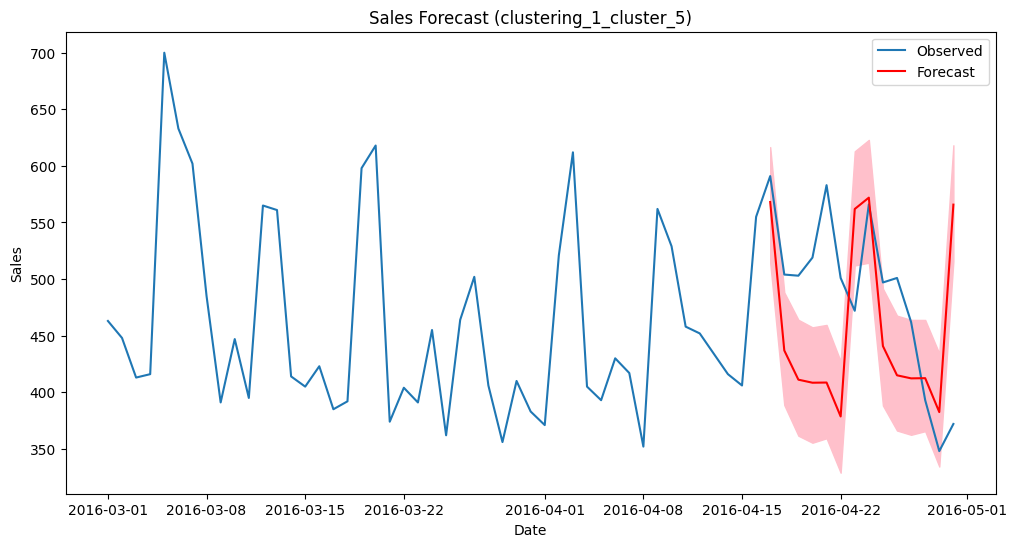

MAPE: 6.297441929372255


In [5]:
from sklearn.metrics import mean_absolute_percentage_error

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(cmp_df[['y']], label='Observed')
plt.plot(cmp_df[['yhat']][-14:], label='Forecast', color='red')
plt.fill_between(cmp_df[-14:].index, cmp_df['yhat_lower'][-14:], cmp_df['yhat_upper'][-14:], color='pink')
plt.title("Sales Forecast (clustering_1_cluster_5)")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

mape = mean_absolute_percentage_error(cmp_df['y'][:-14], cmp_df['yhat'][:-14]) * 100.0
print(f'MAPE: {mape}')

## Мелкая бытовая техника

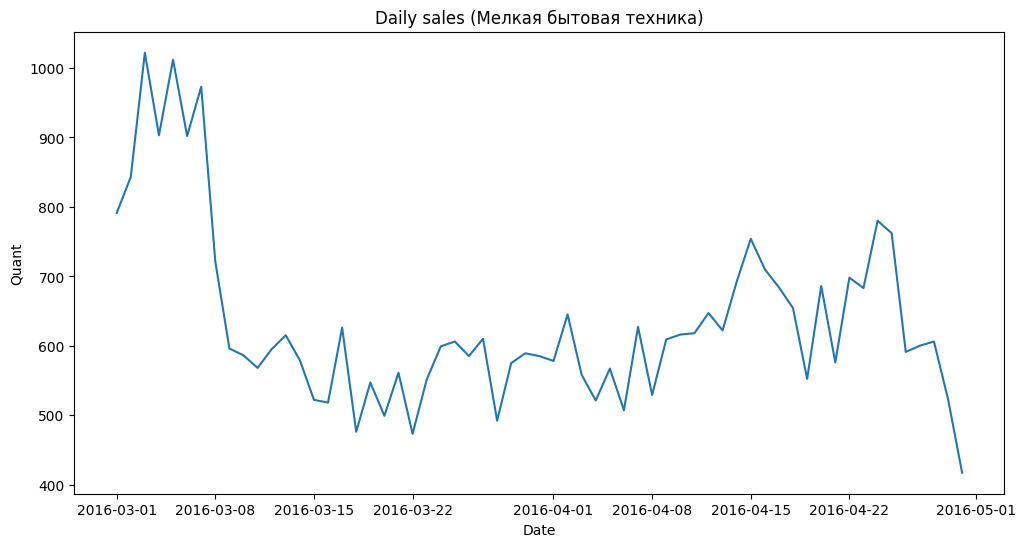

In [30]:
category_name = 'Мелкая бытовая техника'
daily_sales = df[df['TN'] == f'{category_name}'][['OrderDate', 'Quant']]\
    .groupby('OrderDate').sum()\
    .resample('D').sum()
daily_sales.reset_index(inplace=True)
daily_sales.rename(columns={'OrderDate': 'ds', 'Quant': 'y'}, inplace=True)
daily_sales.sort_values(by='ds', inplace=True)

plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_sales, x='ds', y='y')
plt.title(f"Daily sales ({category_name})")
plt.xlabel("Date")
plt.ylabel("Quant")
plt.show()

19:31:32 - cmdstanpy - INFO - Chain [1] start processing
19:31:32 - cmdstanpy - INFO - Chain [1] done processing


,yhat,yhat_lower,yhat_upper,y
ds,,,,
2016-03-01,827.340906,732.158202,918.062839,791
2016-03-02,805.938494,706.828589,903.790276,843
2016-03-03,867.534861,774.226909,965.393712,1022
2016-03-04,808.824229,709.899357,909.868421,903
2016-03-05,837.536626,740.385639,933.952134,1012
...,...,...,...,...
2016-04-26,602.941594,501.002056,704.164120,591
2016-04-27,601.491101,498.952830,689.961986,600
2016-04-28,683.039388,578.334814,776.271502,606


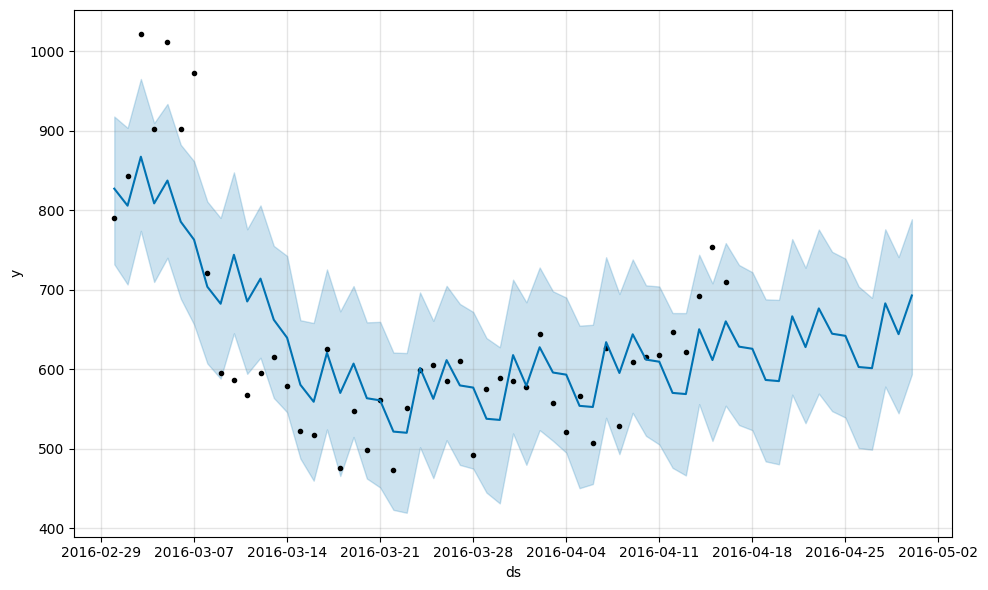

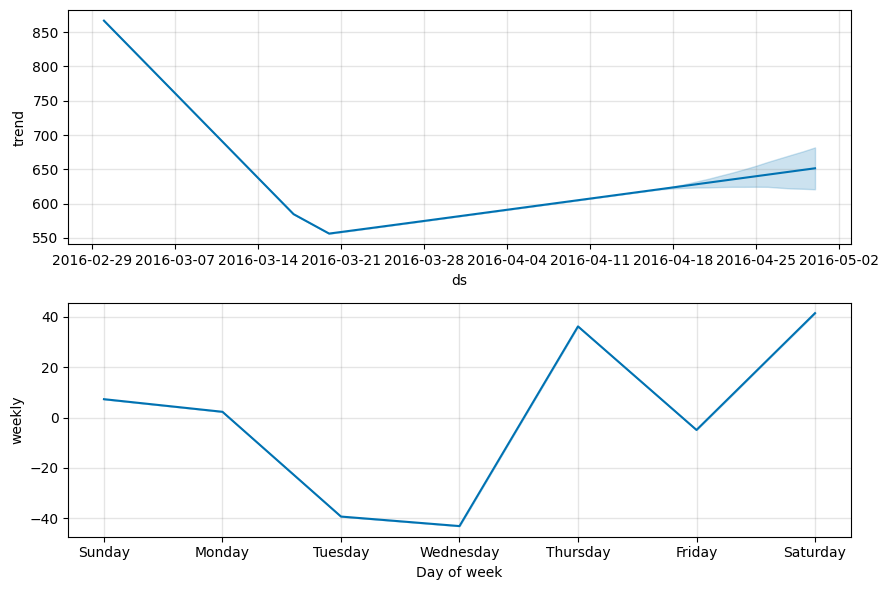

In [31]:
from sklearn.metrics import mean_absolute_percentage_error

model = Prophet()
model.fit(daily_sales[:-14])
future = model.make_future_dataframe(periods=14)
forecast = model.predict(future)
model.plot(forecast)
model.plot_components(forecast)
cmp_df = forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(daily_sales.set_index('ds'))
cmp_df

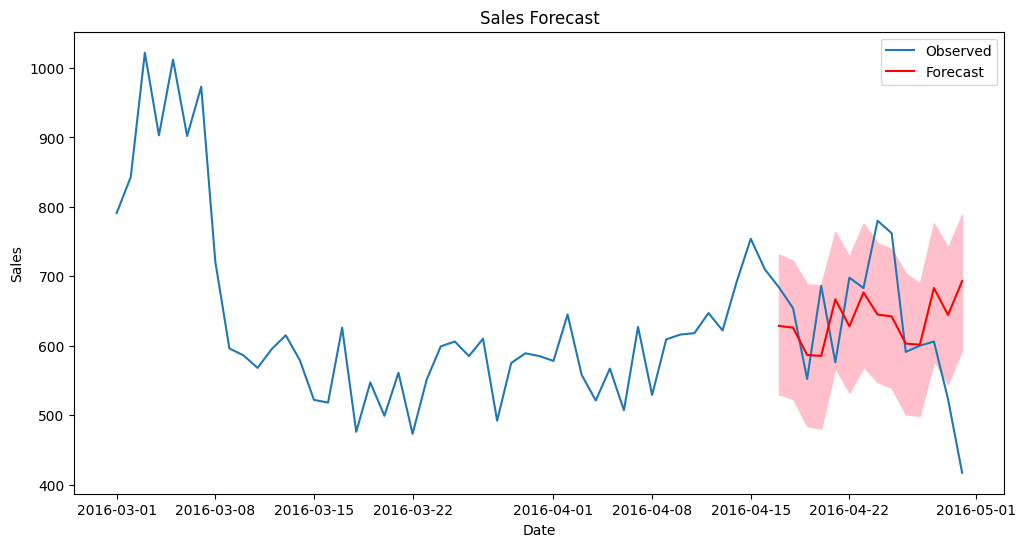

MAPE: 9.204074890788593


In [33]:
from sklearn.metrics import mean_absolute_percentage_error

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(cmp_df[['y']], label='Observed')
plt.plot(cmp_df[['yhat']][-14:], label='Forecast', color='red')
plt.fill_between(cmp_df[-14:].index, cmp_df['yhat_lower'][-14:], cmp_df['yhat_upper'][-14:], color='pink')
plt.title("Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

mape = mean_absolute_percentage_error(cmp_df['y'][:-14], cmp_df['yhat'][:-14]) * 100.0
print(f'MAPE: {mape}')

## Сделай сам

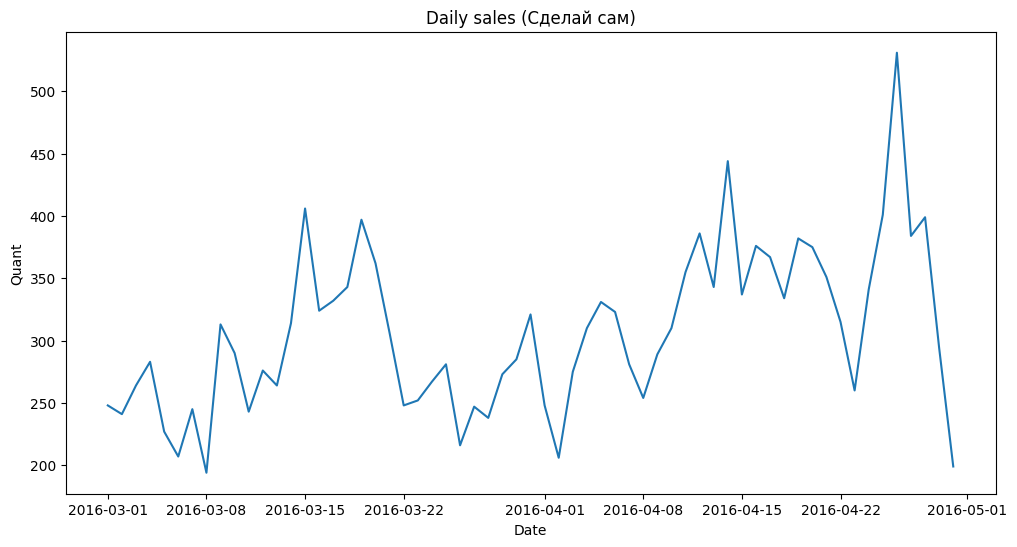

In [6]:
category_name = 'Сделай сам'
daily_sales = df[df['TN'] == f'{category_name}'][['OrderDate', 'Quant']]\
    .groupby('OrderDate').sum()\
    .resample('D').sum()
daily_sales.reset_index(inplace=True)
daily_sales.rename(columns={'OrderDate': 'ds', 'Quant': 'y'}, inplace=True)
daily_sales.sort_values(by='ds', inplace=True)

plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_sales, x='ds', y='y')
plt.title(f"Daily sales ({category_name})")
plt.xlabel("Date")
plt.ylabel("Quant")
plt.show()

08:30:35 - cmdstanpy - INFO - Chain [1] start processing
08:30:35 - cmdstanpy - INFO - Chain [1] done processing


,yhat,yhat_lower,yhat_upper,y
ds,,,,
2016-03-01,260.566140,195.614773,326.784522,248
2016-03-02,259.869794,199.362131,323.126380,241
2016-03-03,276.672677,218.437968,343.240919,264
2016-03-04,246.811387,182.388827,309.713815,283
2016-03-05,246.541825,182.027101,302.996777,227
...,...,...,...,...
2016-04-26,360.539372,296.062418,420.811012,531
2016-04-27,359.843202,296.825660,422.379006,384
2016-04-28,376.646263,311.263801,433.324053,399


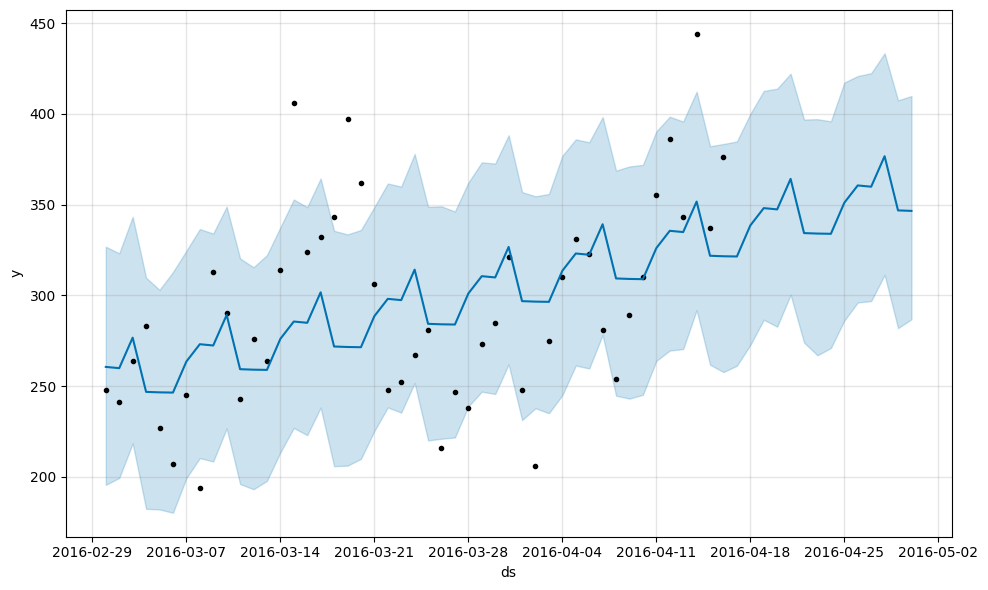

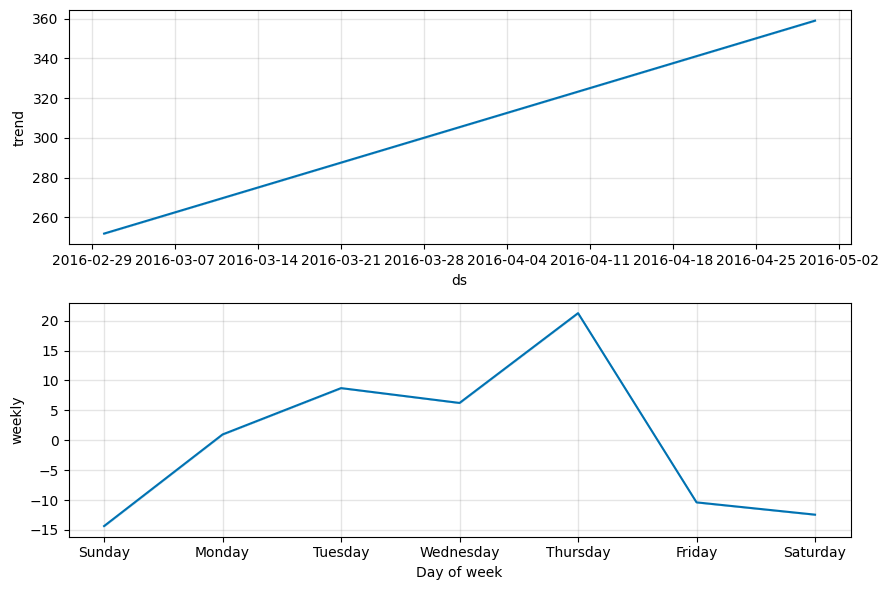

In [7]:
from sklearn.metrics import mean_absolute_percentage_error

model = Prophet()
model.fit(daily_sales[:-14])
future = model.make_future_dataframe(periods=14)
forecast = model.predict(future)
model.plot(forecast)
model.plot_components(forecast)
cmp_df = forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(daily_sales.set_index('ds'))
cmp_df

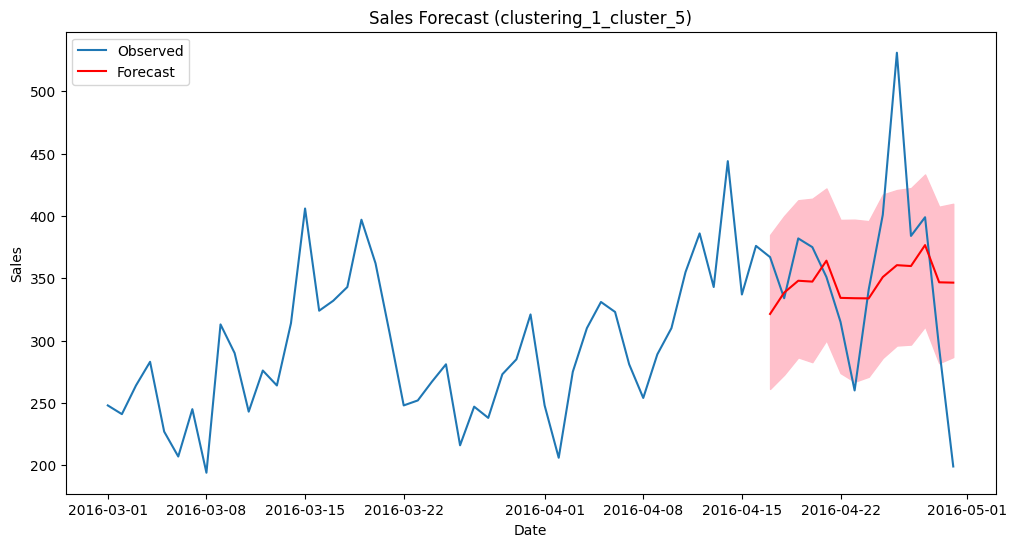

MAPE: 13.256455560381283


In [8]:
from sklearn.metrics import mean_absolute_percentage_error

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(cmp_df[['y']], label='Observed')
plt.plot(cmp_df[['yhat']][-14:], label='Forecast', color='red')
plt.fill_between(cmp_df[-14:].index, cmp_df['yhat_lower'][-14:], cmp_df['yhat_upper'][-14:], color='pink')
plt.title("Sales Forecast (clustering_1_cluster_5)")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

mape = mean_absolute_percentage_error(cmp_df['y'][:-14], cmp_df['yhat'][:-14]) * 100.0
print(f'MAPE: {mape}')

# С учетом акций

In [35]:
actions_values = df['Actions'].value_counts().index
actions_set = set()
for action in actions_values:
    values = action.split(',')
    for value in values:
        actions_set.add(value)

for col in list(actions_set):
    df[col] = df['Actions'].apply(lambda x: int(str(x).find(col) != -1))
df

,Unnamed: 0,Order_ID,Email_new,Phone_new,Source,OrderDate,время,месяц,ChangeDate,DeliveryDate,...,NomFullPath,Week,Nom_ID,СкидкаСуммойПроцентомСЛимитом,Подарки,СкидкаДляСпособаОплаты,СкидкаНаКомплект,НайдёшьДешевле,СкидкаНаТоварПоПромоСлову,БесплатнаяДоставкаНаСуммуКорзины
0,10,1303000511_TT,556669108109_lm16@gmail.com,55574953-52525755535375,Онлайн-Резерв.,2016-03-01,10:46:45.000,201603,2016-03-05 09:16:49.000,2016-03-01 00:00:00.000,...,Техника для дома/Техника для ухода за одеждой/...,9,90364,0,0,0,0,0,0,0
1,12,1303000512_TT,556669108109_lm16@gmail.com,55574953-52525755535375,Онлайн-Резерв.,2016-03-01,10:47:19.000,201603,2016-03-01 10:59:43.000,2016-03-01 00:00:00.000,...,Техника для кухни/Приготовление пищи/Мультиварки/,9,45673,0,0,0,0,0,0,0
2,14,1303000513_TT,666668112117_pu19@ya.ru,55575655-50555350534877,Онлайн-Резерв.,2016-03-11,16:06:56.000,201603,2016-03-11 20:11:18.000,2016-03-12 00:00:00.000,...,"Телевизоры, аудио, видео/Телевизоры/LED телеви...",10,120757,0,0,0,0,0,0,1
3,16,1303000514_TT,666668112117_pu19@ya.ru,55575653-57485657505272,Онлайн-Резерв.,2016-03-15,18:13:33.000,201603,2016-03-15 18:17:35.000,2016-03-22 00:00:00.000,...,Мебель/Мягкая мебель/Диваны/Трехместные диваны/,11,264580,0,0,0,0,0,0,1
4,28,1303000520_TT,56666668112117_pu26@yanded.ru,55575449-54535553535073,Онлайн-Резерв.,2016-03-01,00:01:46.000,201603,2016-03-04 15:09:38.000,2016-03-02 00:00:00.000,...,"Компьютеры, ноутбуки, планшеты/Оргтехника/Расх...",9,76102,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183067,357019,5898089_BX,6666449117_1u9@bk.ru,55574957-51495048515075,Онлайн-Резерв.,2016-04-30,23:51:37.000,201604,2016-05-03 12:55:07.000,2016-05-02 00:00:00.000,...,Техника для дома/Климатическая техника/Кондици...,17,38755,0,0,0,0,0,0,0
183068,357021,5898095_BX,666661118109_vm27@yahoo.com,55575452-55554849505278,Онлайн-Резерв.,2016-04-30,23:54:03.000,201604,2016-05-04 19:43:40.000,2016-05-07 00:00:00.000,...,Фото- и видеотехника/Аксессуары для фото и вид...,17,31908,0,0,0,0,0,0,0
183069,357023,5898099_BX,3110116_nt16@pisem.net,55574948-50554849554878,Онлайн-Резерв.,2016-04-30,23:56:02.000,201604,2016-05-01 11:57:42.000,2016-05-08 00:00:00.000,...,Встраиваемая техника/Вытяжки/,17,140459,0,0,0,0,0,0,1
183070,357024,5898102_BX,55666665102117_fu13@list.ru,55575648-51484956545071,Онлайн-Резерв.,2016-04-30,23:56:38.000,201604,2016-05-06 20:18:49.000,2016-05-05 00:00:00.000,...,Товары для спорта и отдыха/Велосипеды и аксесс...,17,295956,0,0,0,0,0,0,0


## Сделай сам

## Мелкая бытовая техника

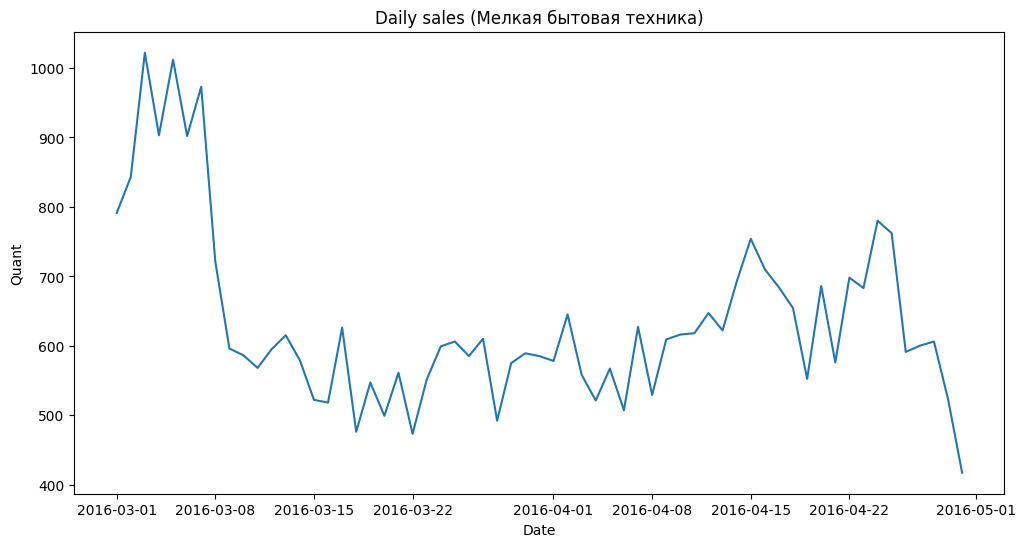

,Action
OrderDate,
2016-03-01,1.0
2016-03-02,1.0
2016-03-03,1.0
2016-03-04,1.0
2016-03-05,1.0
...,...
2016-04-26,1.0
2016-04-27,1.0
2016-04-28,1.0


In [36]:
# СкидкаСуммойПроцентомСЛимитом
category_name = 'Мелкая бытовая техника'
action_name = 'СкидкаСуммойПроцентомСЛимитом'

daily_sales = df[df['TN'] == f'{category_name}'][['OrderDate', 'Quant']]\
    .groupby('OrderDate').sum()\
    .resample('D').sum()
daily_sales.reset_index(inplace=True)
daily_sales.rename(columns={'OrderDate': 'ds', 'Quant': 'y'}, inplace=True)
daily_sales.sort_values(by='ds', inplace=True)

plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_sales, x='ds', y='y')
plt.title(f"Daily sales ({category_name})")
plt.xlabel("Date")
plt.ylabel("Quant")
plt.show()

stat = pd.DataFrame()
category1 = df[df['TN'] == f'{category_name}']
stat['OrderDate'] = category1['OrderDate']
stat['Quant'] = category1[f'{action_name}'] * category1['Quant']
stat = stat.groupby('OrderDate').sum()

action_active = pd.DataFrame(index=stat[stat['Quant'] > 10].index)
action_active['Action'] = 1

action_values = pd.DataFrame(index=stat.index).join(action_active, how='left')
action_values = action_values.fillna(0).reset_index().sort_values(by='OrderDate').set_index('OrderDate')
action_values

In [37]:
action_values = action_values.reset_index().rename(columns={'OrderDate': 'ds'})
daily_sales = daily_sales.join(action_values.set_index('ds'), on='ds')
daily_sales

,ds,y,Action
0,2016-03-01,791,1.0
1,2016-03-02,843,1.0
2,2016-03-03,1022,1.0
3,2016-03-04,903,1.0
4,2016-03-05,1012,1.0
...,...,...,...
56,2016-04-26,591,1.0
57,2016-04-27,600,1.0
58,2016-04-28,606,1.0
59,2016-04-29,523,1.0


19:39:40 - cmdstanpy - INFO - Chain [1] start processing
19:39:40 - cmdstanpy - INFO - Chain [1] done processing


,yhat,yhat_lower,yhat_upper,y,Action
ds,,,,,
2016-03-01,762.076410,647.915589,896.064652,791,1.0
2016-03-02,752.061748,633.469557,867.003945,843,1.0
2016-03-03,825.077219,706.006051,943.222687,1022,1.0
2016-03-04,778.906316,647.959906,900.176066,903,1.0
2016-03-05,799.164006,665.580393,922.549629,1012,1.0
...,...,...,...,...,...
2016-04-26,590.922414,471.499607,718.848760,591,1.0
2016-04-27,580.925021,452.367675,696.991731,600,1.0
2016-04-28,653.957762,527.808271,785.454511,606,1.0


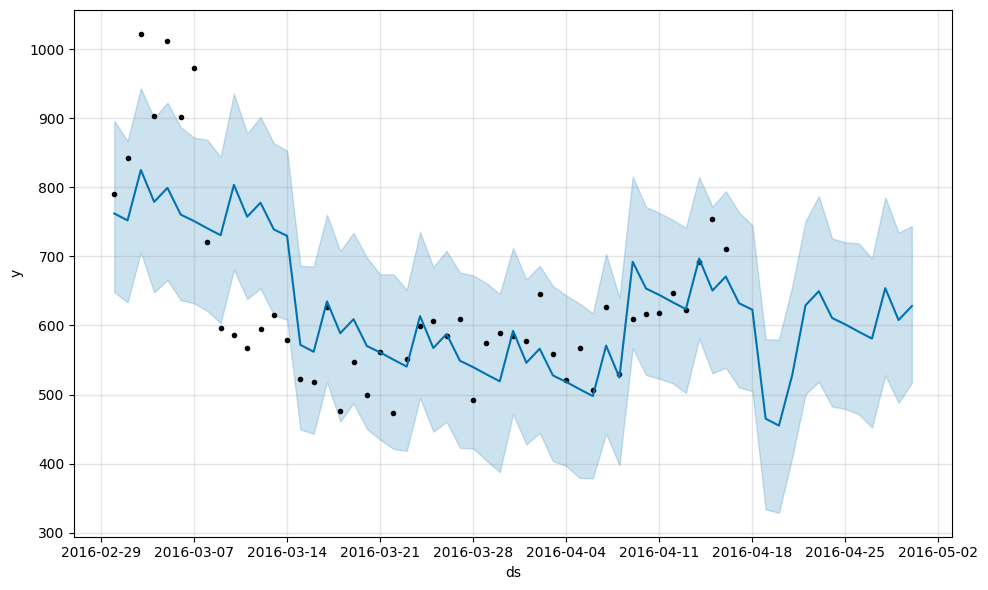

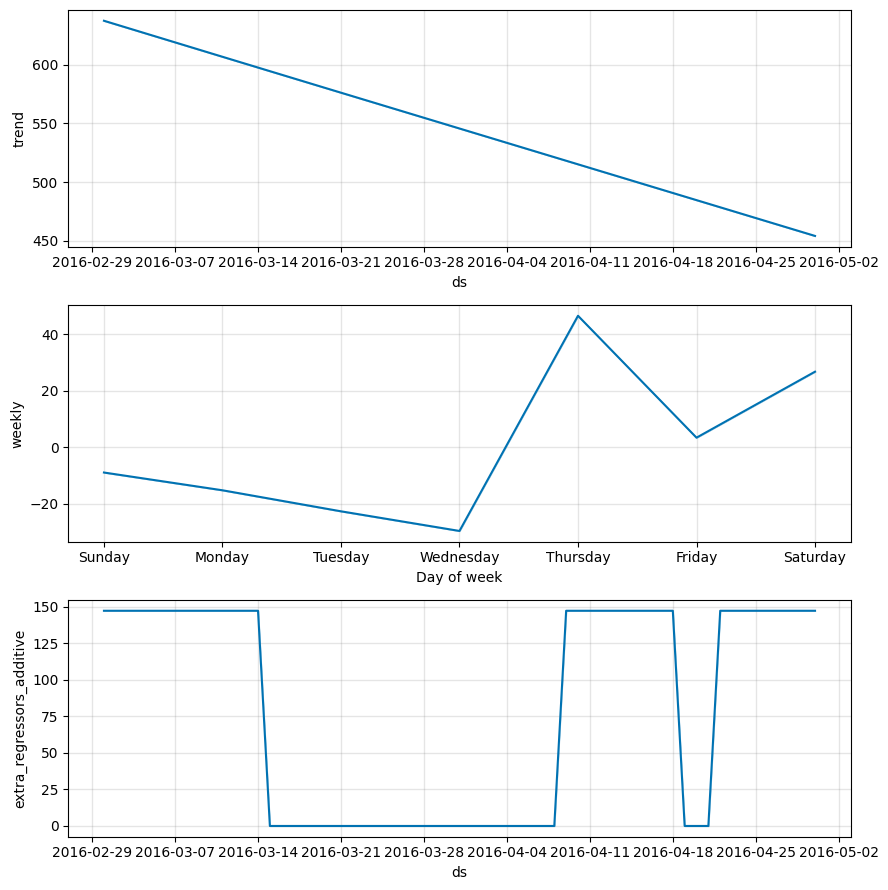

In [38]:
model = Prophet()
model.add_regressor('Action')
model.fit(daily_sales[:-14])

future = model.make_future_dataframe(periods=14)
future['Action'] = daily_sales['Action']

forecast = model.predict(future)

model.plot(forecast)
model.plot_components(forecast)
cmp_df = forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(daily_sales.set_index('ds'))
cmp_df

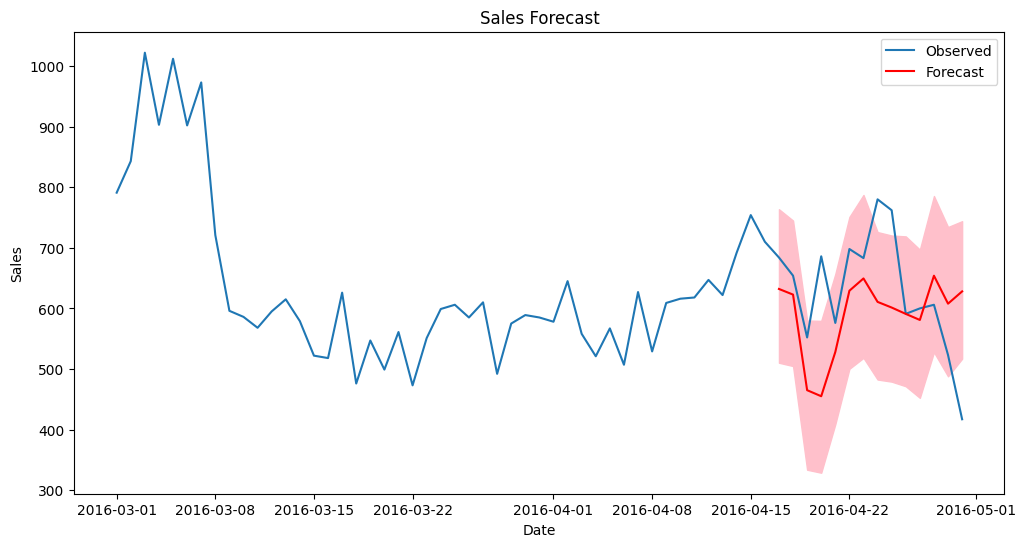

MAPE: 10.823451214861784


In [39]:
# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(cmp_df[['y']], label='Observed')
plt.plot(cmp_df[['yhat']][-14:], label='Forecast', color='red')
plt.fill_between(cmp_df[-14:].index, cmp_df['yhat_lower'][-14:], cmp_df['yhat_upper'][-14:], color='pink')
plt.title("Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

mape = mean_absolute_percentage_error(cmp_df['y'][:-14], cmp_df['yhat'][:-14]) * 100.0
print(f'MAPE: {mape}')

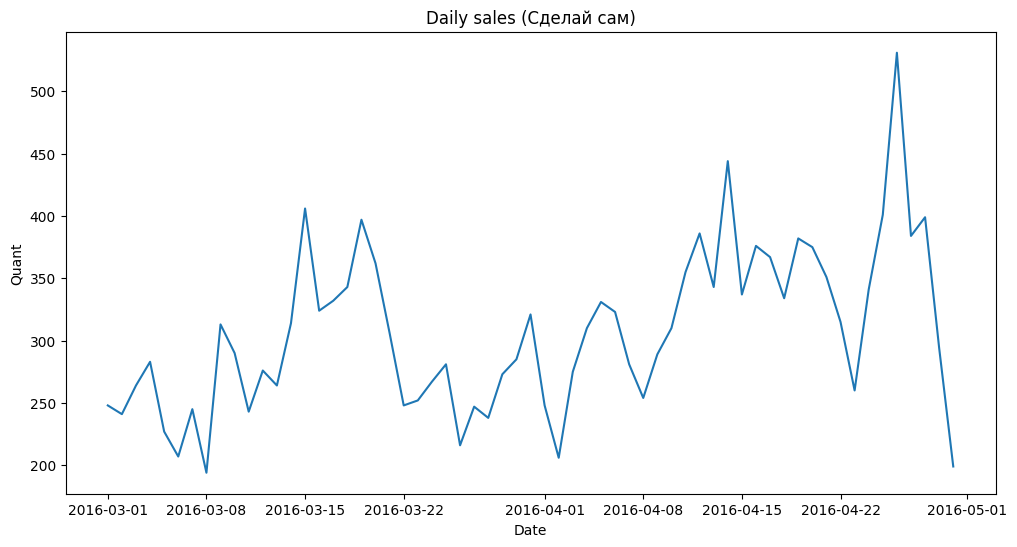

,Action
OrderDate,
2016-03-01,0.0
2016-03-02,0.0
2016-03-03,0.0
2016-03-04,1.0
2016-03-05,1.0
...,...
2016-04-26,1.0
2016-04-27,1.0
2016-04-28,1.0


In [10]:
# СкидкаСуммойПроцентомСЛимитом
category_name = 'Сделай сам'
action_name = 'СкидкаСуммойПроцентомСЛимитом'

daily_sales = df[df['TN'] == f'{category_name}'][['OrderDate', 'Quant']]\
    .groupby('OrderDate').sum()\
    .resample('D').sum()
daily_sales.reset_index(inplace=True)
daily_sales.rename(columns={'OrderDate': 'ds', 'Quant': 'y'}, inplace=True)
daily_sales.sort_values(by='ds', inplace=True)

plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_sales, x='ds', y='y')
plt.title(f"Daily sales ({category_name})")
plt.xlabel("Date")
plt.ylabel("Quant")
plt.show()

stat = pd.DataFrame()
category1 = df[df['TN'] == f'{category_name}']
stat['OrderDate'] = category1['OrderDate']
stat['Quant'] = category1[f'{action_name}'] * category1['Quant']
stat = stat.groupby('OrderDate').sum()

action_active = pd.DataFrame(index=stat[stat['Quant'] > 10].index)
action_active['Action'] = 1

action_values = pd.DataFrame(index=stat.index).join(action_active, how='left')
action_values = action_values.fillna(0).reset_index().sort_values(by='OrderDate').set_index('OrderDate')
action_values

In [11]:
action_values = action_values.reset_index().rename(columns={'OrderDate': 'ds'})
daily_sales = daily_sales.join(action_values.set_index('ds'), on='ds')
daily_sales

,ds,y,Action
0,2016-03-01,248,0.0
1,2016-03-02,241,0.0
2,2016-03-03,264,0.0
3,2016-03-04,283,1.0
4,2016-03-05,227,1.0
...,...,...,...
56,2016-04-26,531,1.0
57,2016-04-27,384,1.0
58,2016-04-28,399,1.0
59,2016-04-29,294,0.0


08:30:41 - cmdstanpy - INFO - Chain [1] start processing


08:30:41 - cmdstanpy - INFO - Chain [1] done processing


,yhat,yhat_lower,yhat_upper,y,Action
ds,,,,,
2016-03-01,242.080635,183.750436,300.961644,248,0.0
2016-03-02,247.506622,194.756339,304.782994,241,0.0
2016-03-03,258.226792,200.607073,315.736869,264,0.0
2016-03-04,277.395741,219.014137,332.946950,283,1.0
2016-03-05,270.961185,212.318423,330.550080,227,1.0
...,...,...,...,...,...
2016-04-26,368.547808,311.687800,421.698081,531,1.0
2016-04-27,373.973796,317.936333,432.171837,384,1.0
2016-04-28,384.693968,329.516172,440.153170,399,1.0


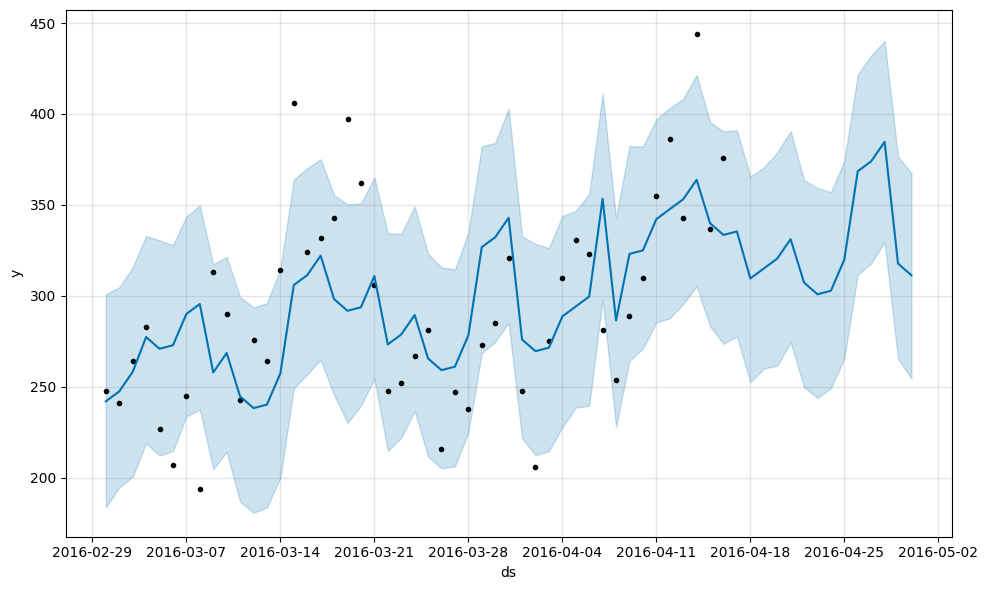

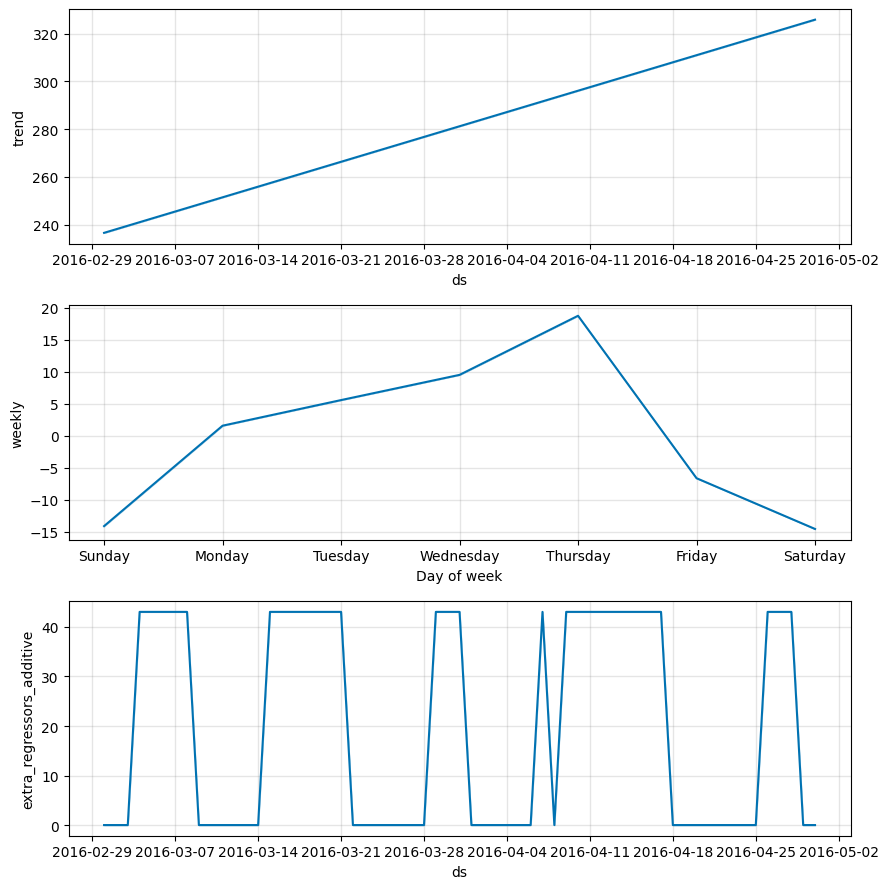

In [12]:
model = Prophet()
model.add_regressor('Action')
model.fit(daily_sales[:-14])

future = model.make_future_dataframe(periods=14)
future['Action'] = daily_sales['Action']

forecast = model.predict(future)

model.plot(forecast)
model.plot_components(forecast)
cmp_df = forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(daily_sales.set_index('ds'))
cmp_df

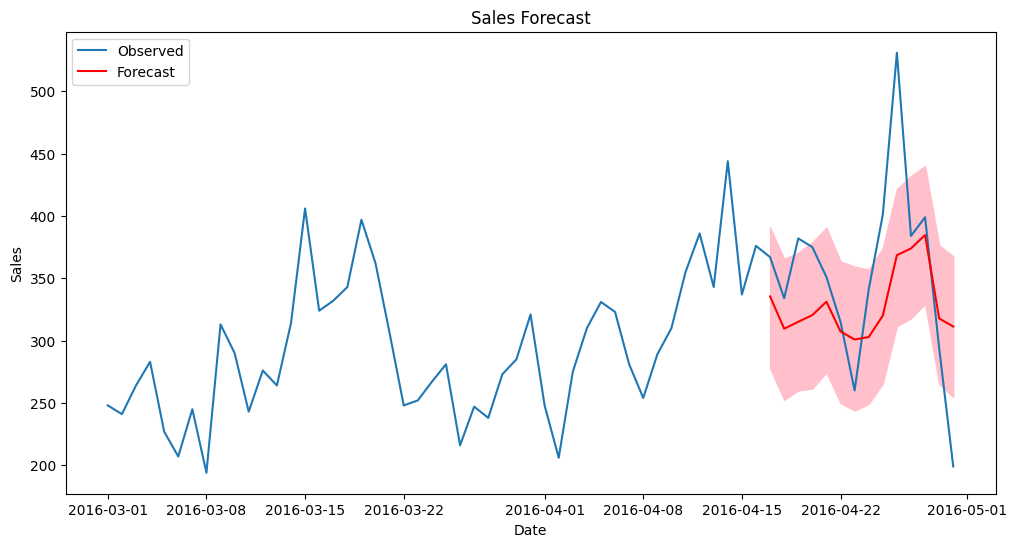

MAPE: 12.343655127946375


In [13]:
# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(cmp_df[['y']], label='Observed')
plt.plot(cmp_df[['yhat']][-14:], label='Forecast', color='red')
plt.fill_between(cmp_df[-14:].index, cmp_df['yhat_lower'][-14:], cmp_df['yhat_upper'][-14:], color='pink')
plt.title("Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

mape = mean_absolute_percentage_error(cmp_df['y'][:-14], cmp_df['yhat'][:-14]) * 100.0
print(f'MAPE: {mape}')

# C учетом кластеризации

In [40]:
clustering_results_1 = pd.read_csv('clustering_results_1.csv')
df_clustering_1 = df.join(clustering_results_1[['Phone_new', 'cluster']].set_index('Phone_new'), on='Phone_new')
df_clustering_1['cluster'].value_counts()

cluster
0    132143
5     31926
2     10321
4      5271
3      2753
1       611
6        47
Name: count, dtype: int64

## Сделай сам

### Кластер 0

/var/folders/bh/d932d5zj56z9_y_7lh3s66ndf1n4c9/T/ipykernel_2162/607793505.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  daily_sales = df_clustering_1[df_clustering_1['cluster'] == cluster][df_clustering_1['TN'] == f'{category_name}'][['OrderDate', 'Quant']]\


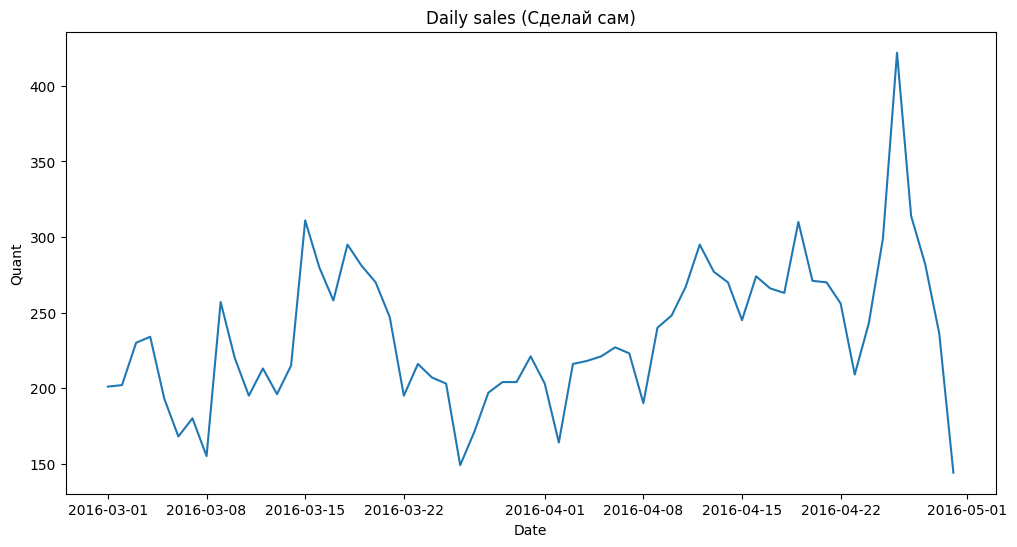

In [51]:
cluster = 0
action_name = 'СкидкаСуммойПроцентомСЛимитом'
category_name = 'Сделай сам'

daily_sales = df_clustering_1[df_clustering_1['cluster'] == cluster][df_clustering_1['TN'] == f'{category_name}'][['OrderDate', 'Quant']]\
    .groupby('OrderDate').sum()\
    .resample('D').sum()
daily_sales.reset_index(inplace=True)
daily_sales.rename(columns={'OrderDate': 'ds', 'Quant': 'y'}, inplace=True)
daily_sales.sort_values(by='ds', inplace=True)

plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_sales, x='ds', y='y')
plt.title(f"Daily sales ({category_name})")
plt.xlabel("Date")
plt.ylabel("Quant")
plt.show()

stat = pd.DataFrame()
category1 = df[df['TN'] == f'{category_name}']
stat['OrderDate'] = category1['OrderDate']
stat['Quant'] = category1[f'{action_name}'] * category1['Quant']
stat = stat.groupby('OrderDate').sum()

action_active = pd.DataFrame(index=stat[stat['Quant'] > 10].index)
action_active['Action'] = 1

action_values = pd.DataFrame(index=stat.index).join(action_active, how='left')
action_values = action_values.fillna(0).reset_index().sort_values(by='OrderDate').set_index('OrderDate')

In [52]:
action_values

,Action
OrderDate,
2016-03-01,0.0
2016-03-02,0.0
2016-03-03,0.0
2016-03-04,1.0
2016-03-05,1.0
...,...
2016-04-26,1.0
2016-04-27,1.0
2016-04-28,1.0


In [53]:
action_values = action_values.reset_index().rename(columns={'OrderDate': 'ds'})
daily_sales = daily_sales.join(action_values.set_index('ds'), on='ds')
daily_sales

,ds,y,Action
0,2016-03-01,201,0.0
1,2016-03-02,202,0.0
2,2016-03-03,230,0.0
3,2016-03-04,234,1.0
4,2016-03-05,193,1.0
...,...,...,...
56,2016-04-26,422,1.0
57,2016-04-27,314,1.0
58,2016-04-28,282,1.0
59,2016-04-29,236,0.0


19:45:47 - cmdstanpy - INFO - Chain [1] start processing
19:45:47 - cmdstanpy - INFO - Chain [1] done processing


,yhat,yhat_lower,yhat_upper,y,Action
ds,,,,,
2016-03-01,193.197427,149.884425,236.106524,201,0.0
2016-03-02,210.067999,170.606684,250.970663,202,0.0
2016-03-03,199.911305,156.347002,238.919932,230,0.0
2016-03-04,233.171690,195.893012,272.647634,234,1.0
2016-03-05,220.586574,179.230265,261.754527,193,1.0
...,...,...,...,...,...
2016-04-26,261.206518,223.936151,303.893988,422,1.0
2016-04-27,278.077119,239.472280,319.643463,314,1.0
2016-04-28,267.920454,228.037049,309.610365,282,1.0


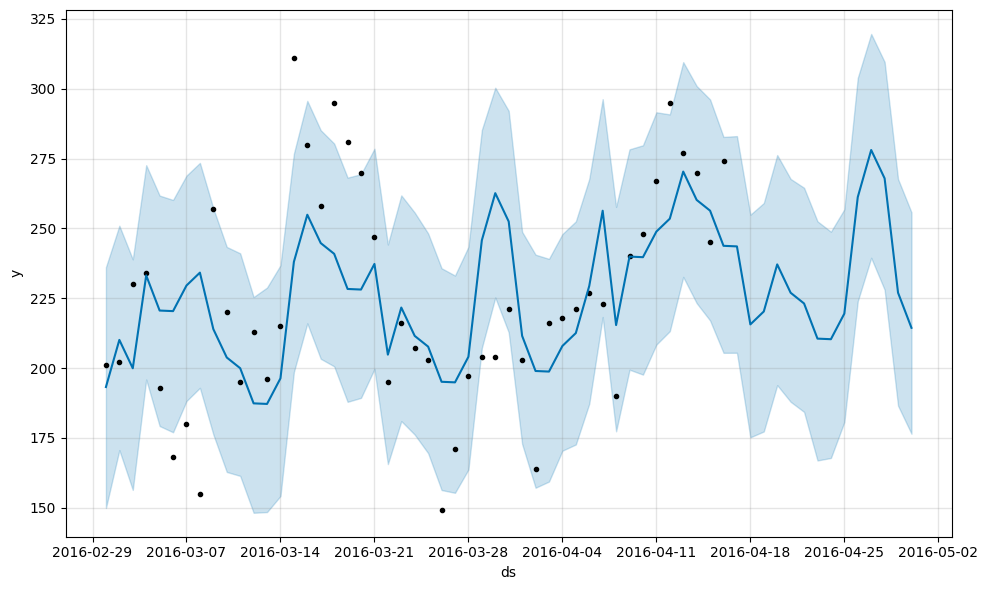

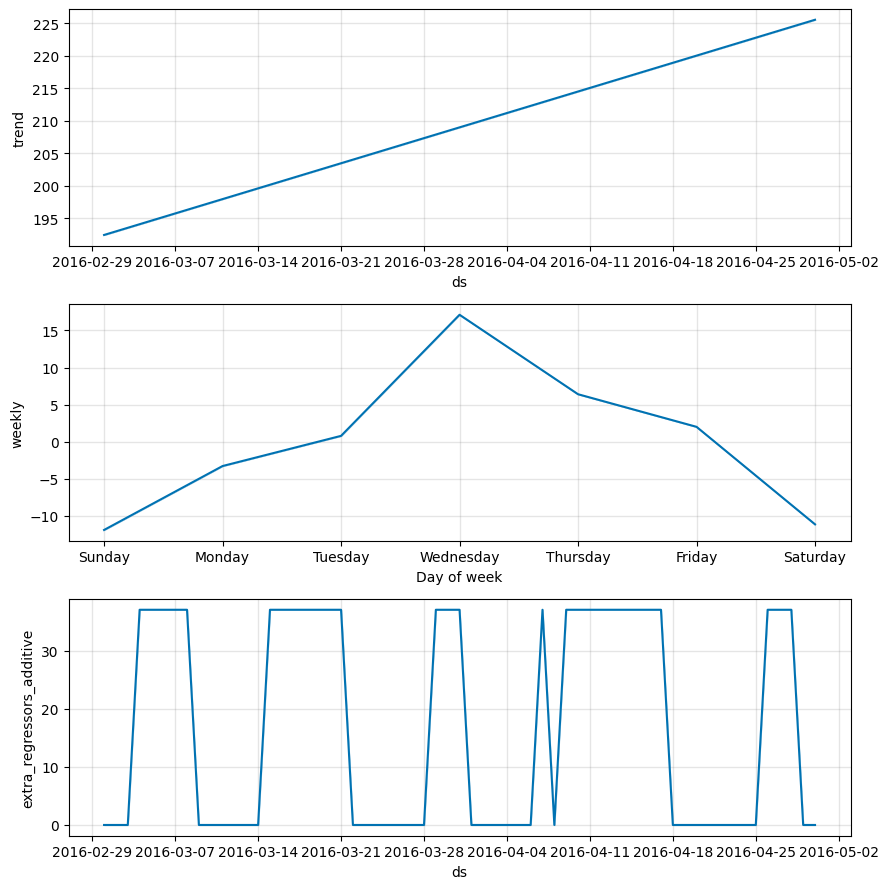

In [54]:
model = Prophet()
model.add_regressor('Action')
model.fit(daily_sales[:-14])

future = model.make_future_dataframe(periods=14)
future['Action'] = daily_sales['Action']

forecast = model.predict(future)

model.plot(forecast)
model.plot_components(forecast)
cmp_df = forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(daily_sales.set_index('ds'))
cmp_df

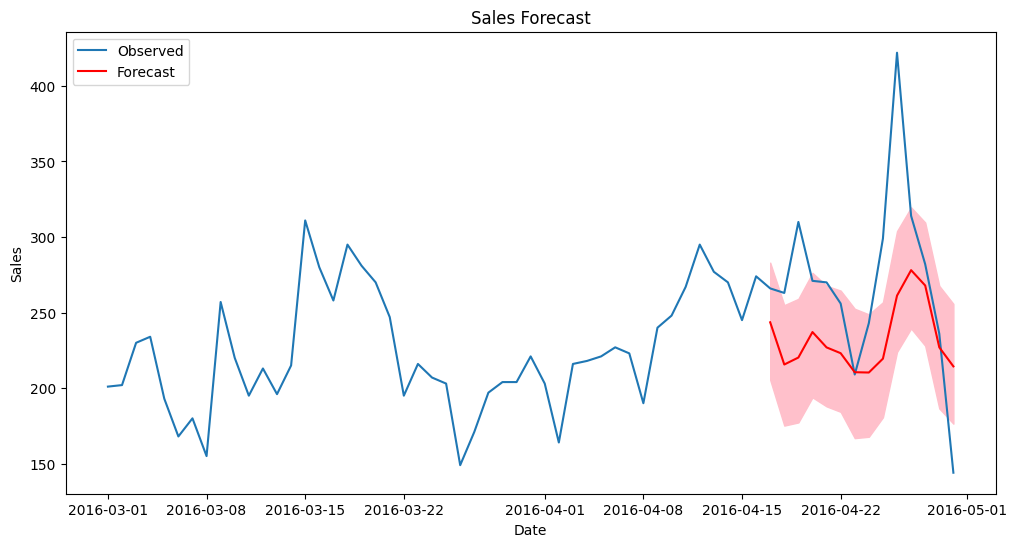

MAPE: 11.334104249185916


In [55]:
# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(cmp_df[['y']], label='Observed')
plt.plot(cmp_df[['yhat']][-14:], label='Forecast', color='red')
plt.fill_between(cmp_df[-14:].index, cmp_df['yhat_lower'][-14:], cmp_df['yhat_upper'][-14:], color='pink')
plt.title("Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

mape = mean_absolute_percentage_error(cmp_df['y'][:-14], cmp_df['yhat'][:-14]) * 100.0
print(f'MAPE: {mape}')

### Кластер 5

/var/folders/bh/d932d5zj56z9_y_7lh3s66ndf1n4c9/T/ipykernel_2162/2203101575.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  daily_sales = df_clustering_1[df_clustering_1['cluster'] == cluster][df_clustering_1['TN'] == f'{category_name}'][['OrderDate', 'Quant']]\


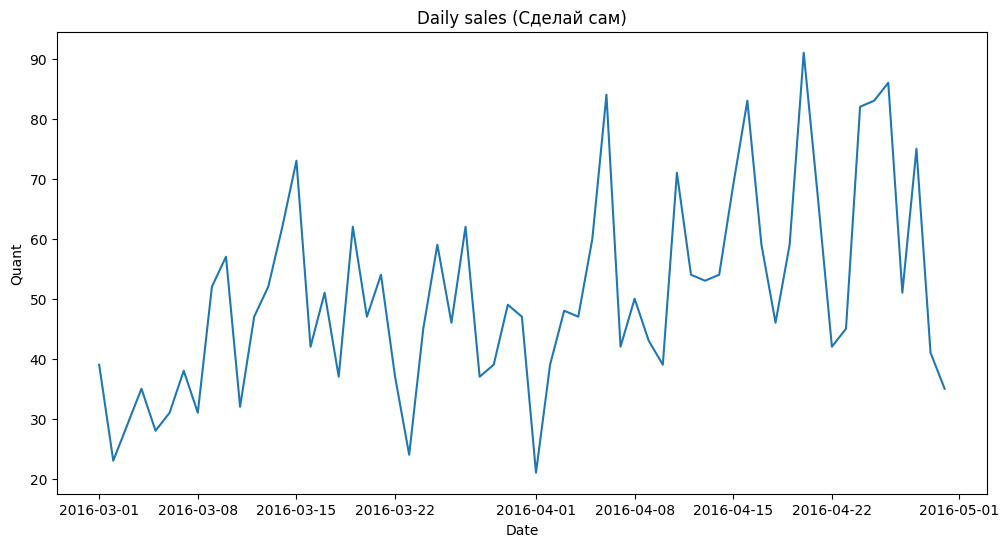

In [56]:
cluster = 5
action_name = 'СкидкаСуммойПроцентомСЛимитом'
category_name = 'Сделай сам'

daily_sales = df_clustering_1[df_clustering_1['cluster'] == cluster][df_clustering_1['TN'] == f'{category_name}'][['OrderDate', 'Quant']]\
    .groupby('OrderDate').sum()\
    .resample('D').sum()
daily_sales.reset_index(inplace=True)
daily_sales.rename(columns={'OrderDate': 'ds', 'Quant': 'y'}, inplace=True)
daily_sales.sort_values(by='ds', inplace=True)

plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_sales, x='ds', y='y')
plt.title(f"Daily sales ({category_name})")
plt.xlabel("Date")
plt.ylabel("Quant")
plt.show()

stat = pd.DataFrame()
category1 = df[df['TN'] == f'{category_name}']
stat['OrderDate'] = category1['OrderDate']
stat['Quant'] = category1[f'{action_name}'] * category1['Quant']
stat = stat.groupby('OrderDate').sum()

action_active = pd.DataFrame(index=stat[stat['Quant'] > 10].index)
action_active['Action'] = 1

action_values = pd.DataFrame(index=stat.index).join(action_active, how='left')
action_values = action_values.fillna(0).reset_index().sort_values(by='OrderDate').set_index('OrderDate')

In [57]:
action_values = action_values.reset_index().rename(columns={'OrderDate': 'ds'})
daily_sales = daily_sales.join(action_values.set_index('ds'), on='ds')
daily_sales

,ds,y,Action
0,2016-03-01,39,0.0
1,2016-03-02,23,0.0
2,2016-03-03,29,0.0
3,2016-03-04,35,1.0
4,2016-03-05,28,1.0
...,...,...,...
56,2016-04-26,86,1.0
57,2016-04-27,51,1.0
58,2016-04-28,75,1.0
59,2016-04-29,41,0.0


19:45:57 - cmdstanpy - INFO - Chain [1] start processing
19:45:57 - cmdstanpy - INFO - Chain [1] done processing


,yhat,yhat_lower,yhat_upper,y,Action
ds,,,,,
2016-03-01,37.063323,21.859728,52.083996,39,0.0
2016-03-02,36.279245,20.905836,52.479977,23,0.0
2016-03-03,35.920466,18.669194,52.161089,29,0.0
2016-03-04,33.362088,16.609123,49.876583,35,1.0
2016-03-05,39.717576,22.549124,55.899598,28,1.0
...,...,...,...,...,...
2016-04-26,64.815288,47.629801,79.524641,86,1.0
2016-04-27,64.031210,48.583819,79.686916,51,1.0
2016-04-28,63.672431,48.455532,80.337418,75,1.0


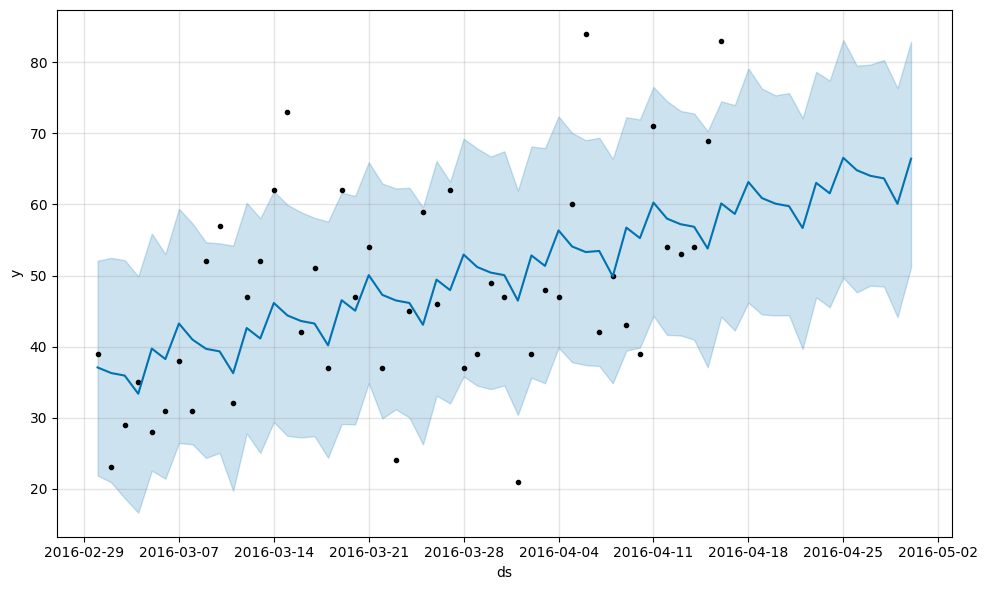

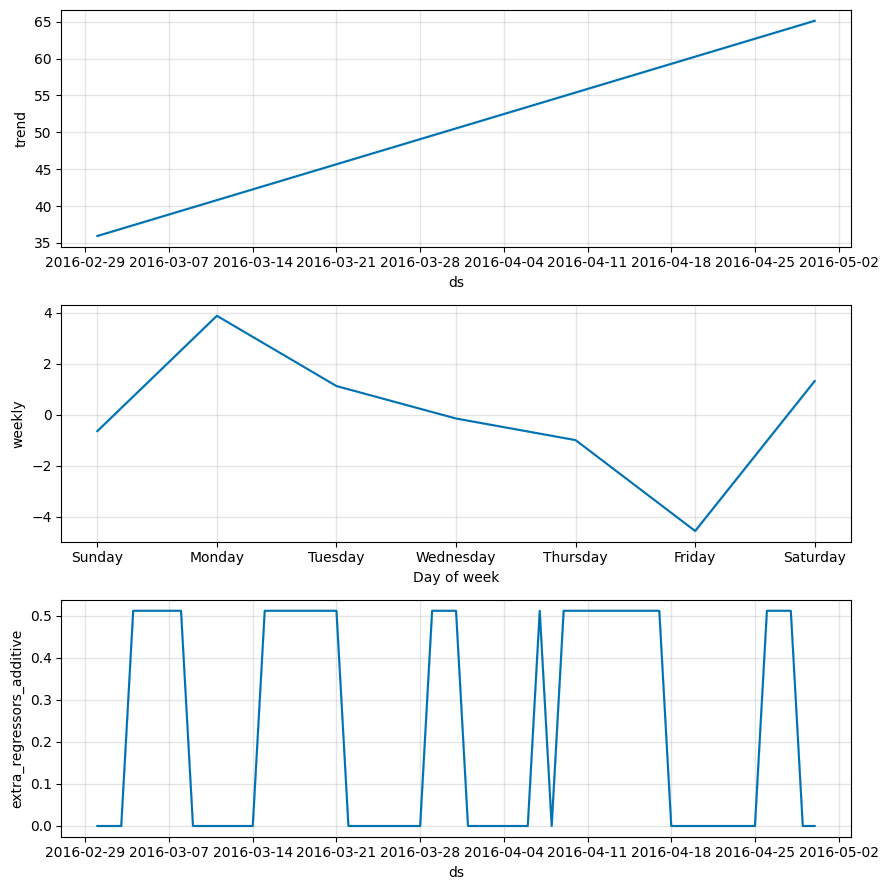

In [58]:
model = Prophet()
model.add_regressor('Action')
model.fit(daily_sales[:-14])

future = model.make_future_dataframe(periods=14)
future['Action'] = daily_sales['Action']

forecast = model.predict(future)

model.plot(forecast)
model.plot_components(forecast)
cmp_df = forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(daily_sales.set_index('ds'))
cmp_df

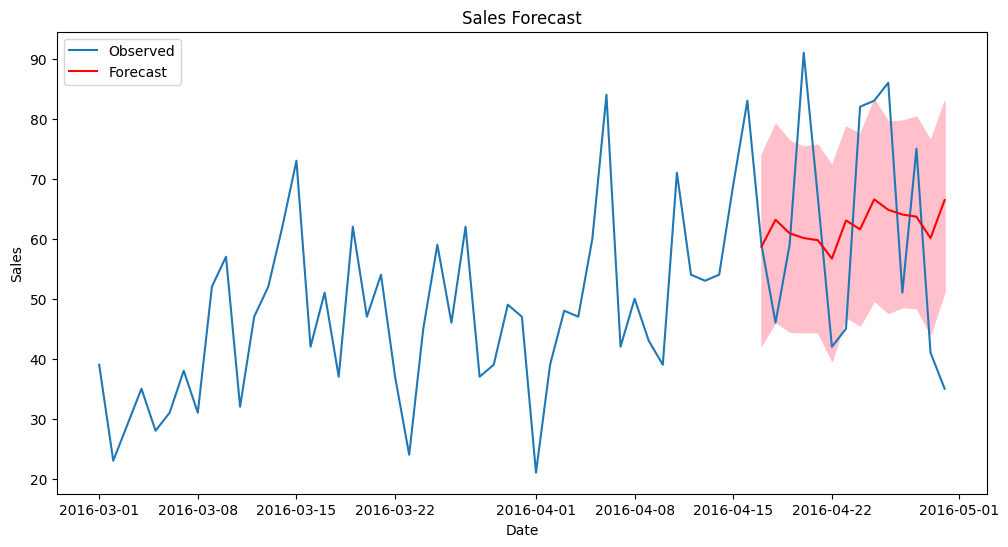

MAPE: 23.636692516252417


In [59]:
# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(cmp_df[['y']], label='Observed')
plt.plot(cmp_df[['yhat']][-14:], label='Forecast', color='red')
plt.fill_between(cmp_df[-14:].index, cmp_df['yhat_lower'][-14:], cmp_df['yhat_upper'][-14:], color='pink')
plt.title("Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

mape = mean_absolute_percentage_error(cmp_df['y'][:-14], cmp_df['yhat'][:-14]) * 100.0
print(f'MAPE: {mape}')

## Мелкая бытовая техника

### Кластер 0

/var/folders/bh/d932d5zj56z9_y_7lh3s66ndf1n4c9/T/ipykernel_2162/3056733712.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  daily_sales = df_clustering_1[df_clustering_1['cluster'] == cluster][df_clustering_1['TN'] == f'{category_name}'][['OrderDate', 'Quant']]\


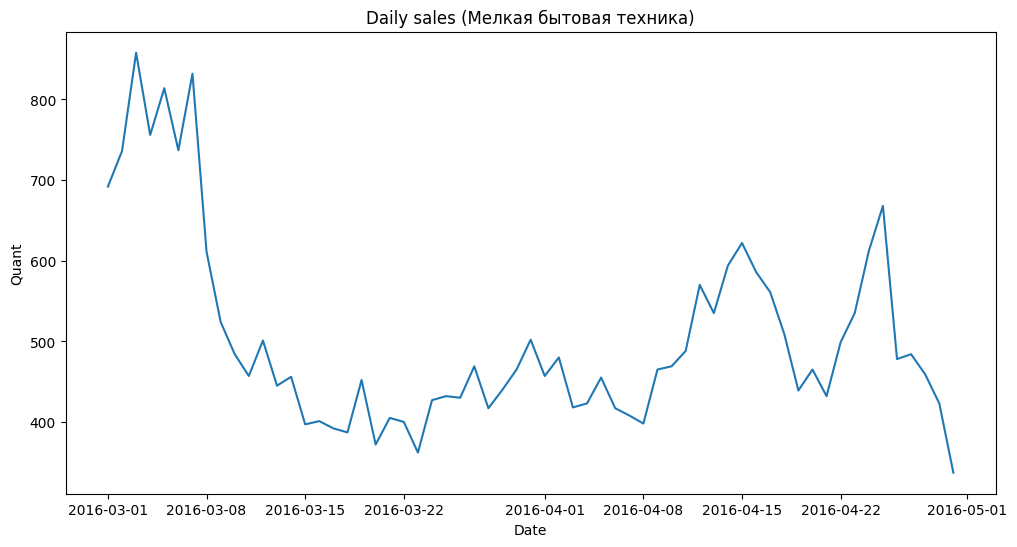

In [60]:
cluster = 0
action_name = 'СкидкаСуммойПроцентомСЛимитом'
category_name = 'Мелкая бытовая техника'

daily_sales = df_clustering_1[df_clustering_1['cluster'] == cluster][df_clustering_1['TN'] == f'{category_name}'][['OrderDate', 'Quant']]\
    .groupby('OrderDate').sum()\
    .resample('D').sum()
daily_sales.reset_index(inplace=True)
daily_sales.rename(columns={'OrderDate': 'ds', 'Quant': 'y'}, inplace=True)
daily_sales.sort_values(by='ds', inplace=True)

plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_sales, x='ds', y='y')
plt.title(f"Daily sales ({category_name})")
plt.xlabel("Date")
plt.ylabel("Quant")
plt.show()

stat = pd.DataFrame()
category1 = df[df['TN'] == f'{category_name}']
stat['OrderDate'] = category1['OrderDate']
stat['Quant'] = category1[f'{action_name}'] * category1['Quant']
stat = stat.groupby('OrderDate').sum()

action_active = pd.DataFrame(index=stat[stat['Quant'] > 10].index)
action_active['Action'] = 1

action_values = pd.DataFrame(index=stat.index).join(action_active, how='left')
action_values = action_values.fillna(0).reset_index().sort_values(by='OrderDate').set_index('OrderDate')

In [61]:
action_values

,Action
OrderDate,
2016-03-01,1.0
2016-03-02,1.0
2016-03-03,1.0
2016-03-04,1.0
2016-03-05,1.0
...,...
2016-04-26,1.0
2016-04-27,1.0
2016-04-28,1.0


In [62]:
action_values = action_values.reset_index().rename(columns={'OrderDate': 'ds'})
daily_sales = daily_sales.join(action_values.set_index('ds'), on='ds')
daily_sales

,ds,y,Action
0,2016-03-01,692,1.0
1,2016-03-02,736,1.0
2,2016-03-03,858,1.0
3,2016-03-04,756,1.0
4,2016-03-05,814,1.0
...,...,...,...
56,2016-04-26,478,1.0
57,2016-04-27,484,1.0
58,2016-04-28,459,1.0
59,2016-04-29,423,1.0


19:46:39 - cmdstanpy - INFO - Chain [1] start processing
19:46:40 - cmdstanpy - INFO - Chain [1] done processing


,yhat,yhat_lower,yhat_upper,y,Action
ds,,,,,
2016-03-01,656.260461,544.530835,752.271487,692,1.0
2016-03-02,638.367689,528.997567,756.332139,736,1.0
2016-03-03,670.472554,559.242313,774.097816,858,1.0
2016-03-04,648.148404,543.010073,756.186323,756,1.0
2016-03-05,656.472338,548.442142,768.877300,814,1.0
...,...,...,...,...,...
2016-04-26,509.565378,407.925533,614.834823,478,1.0
2016-04-27,491.724075,380.026025,600.997432,484,1.0
2016-04-28,523.880409,411.259622,641.329660,459,1.0


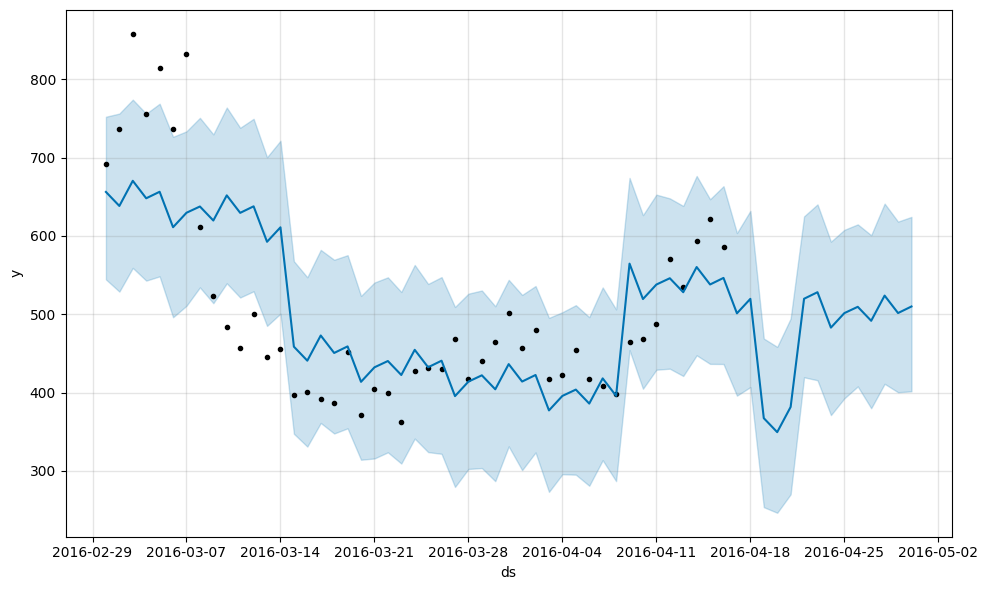

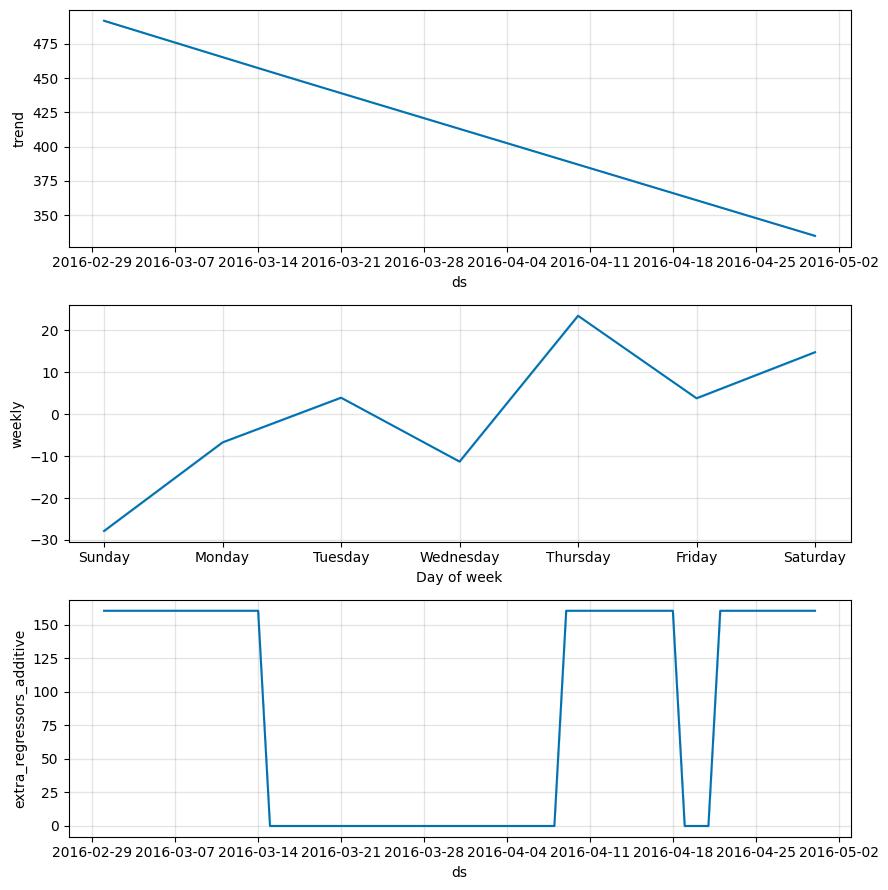

In [63]:
model = Prophet()
model.add_regressor('Action')
model.fit(daily_sales[:-14])

future = model.make_future_dataframe(periods=14)
future['Action'] = daily_sales['Action']

forecast = model.predict(future)

model.plot(forecast)
model.plot_components(forecast)
cmp_df = forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(daily_sales.set_index('ds'))
cmp_df

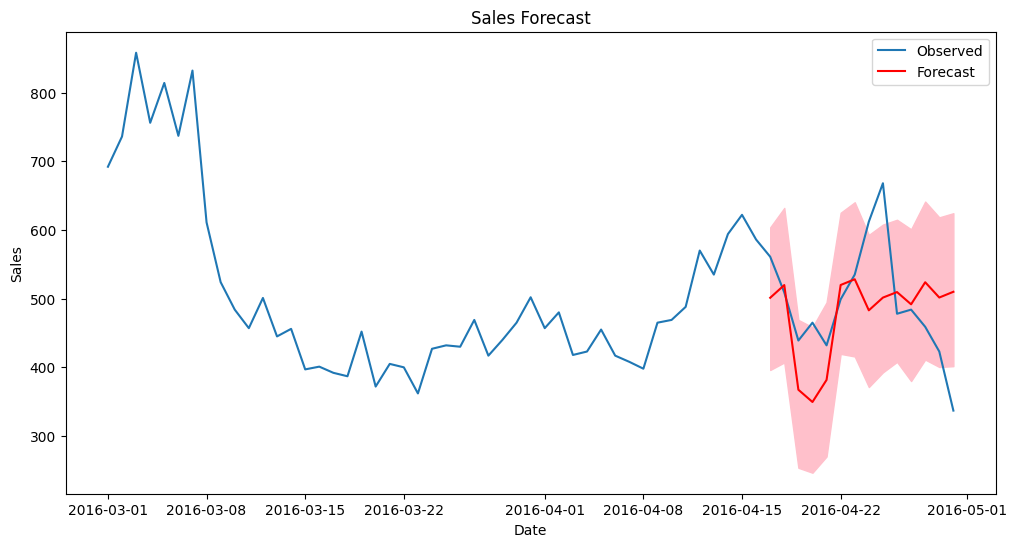

MAPE: 12.817620562783366


In [64]:
# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(cmp_df[['y']], label='Observed')
plt.plot(cmp_df[['yhat']][-14:], label='Forecast', color='red')
plt.fill_between(cmp_df[-14:].index, cmp_df['yhat_lower'][-14:], cmp_df['yhat_upper'][-14:], color='pink')
plt.title("Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

mape = mean_absolute_percentage_error(cmp_df['y'][:-14], cmp_df['yhat'][:-14]) * 100.0
print(f'MAPE: {mape}')

### Кластер 5

/var/folders/bh/d932d5zj56z9_y_7lh3s66ndf1n4c9/T/ipykernel_2162/3582714271.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  daily_sales = df_clustering_1[df_clustering_1['cluster'] == cluster][df_clustering_1['TN'] == f'{category_name}'][['OrderDate', 'Quant']]\


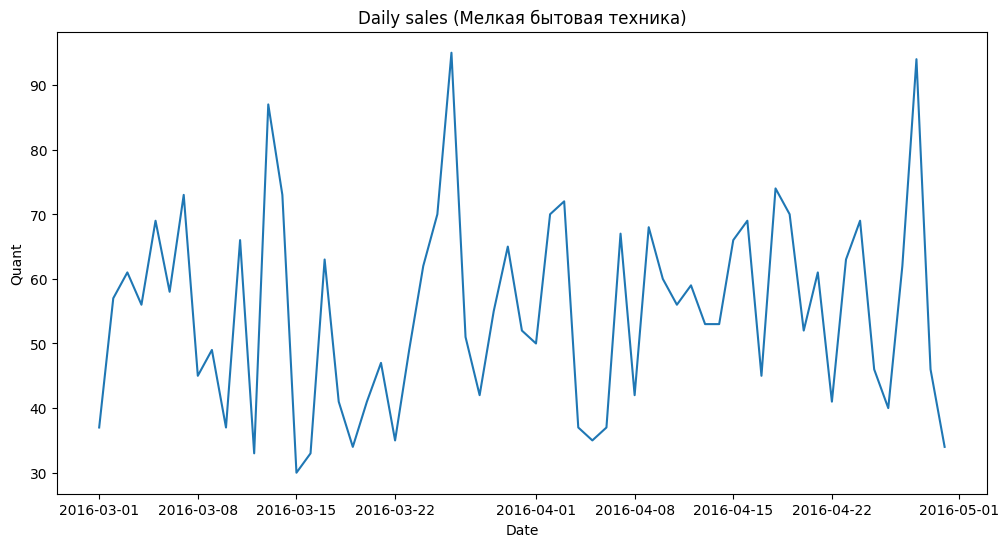

In [65]:
cluster = 5
action_name = 'СкидкаСуммойПроцентомСЛимитом'
category_name = 'Мелкая бытовая техника'

daily_sales = df_clustering_1[df_clustering_1['cluster'] == cluster][df_clustering_1['TN'] == f'{category_name}'][['OrderDate', 'Quant']]\
    .groupby('OrderDate').sum()\
    .resample('D').sum()
daily_sales.reset_index(inplace=True)
daily_sales.rename(columns={'OrderDate': 'ds', 'Quant': 'y'}, inplace=True)
daily_sales.sort_values(by='ds', inplace=True)

plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_sales, x='ds', y='y')
plt.title(f"Daily sales ({category_name})")
plt.xlabel("Date")
plt.ylabel("Quant")
plt.show()

stat = pd.DataFrame()
category1 = df[df['TN'] == f'{category_name}']
stat['OrderDate'] = category1['OrderDate']
stat['Quant'] = category1[f'{action_name}'] * category1['Quant']
stat = stat.groupby('OrderDate').sum()

action_active = pd.DataFrame(index=stat[stat['Quant'] > 10].index)
action_active['Action'] = 1

action_values = pd.DataFrame(index=stat.index).join(action_active, how='left')
action_values = action_values.fillna(0).reset_index().sort_values(by='OrderDate').set_index('OrderDate')

In [66]:
action_values = action_values.reset_index().rename(columns={'OrderDate': 'ds'})
daily_sales = daily_sales.join(action_values.set_index('ds'), on='ds')
daily_sales

,ds,y,Action
0,2016-03-01,37,1.0
1,2016-03-02,57,1.0
2,2016-03-03,61,1.0
3,2016-03-04,56,1.0
4,2016-03-05,69,1.0
...,...,...,...
56,2016-04-26,40,1.0
57,2016-04-27,62,1.0
58,2016-04-28,94,1.0
59,2016-04-29,46,1.0


19:46:52 - cmdstanpy - INFO - Chain [1] start processing


19:46:52 - cmdstanpy - INFO - Chain [1] done processing


,yhat,yhat_lower,yhat_upper,y,Action
ds,,,,,
2016-03-01,43.787210,27.962347,60.100047,37,1.0
2016-03-02,50.492223,33.755178,65.795412,57,1.0
2016-03-03,57.910311,41.908514,74.205551,61,1.0
2016-03-04,57.342085,42.327293,74.269153,56,1.0
2016-03-05,62.993220,46.600278,78.659298,69,1.0
...,...,...,...,...,...
2016-04-26,51.068995,34.685535,68.750085,40,1.0
2016-04-27,57.774008,41.386043,73.547646,62,1.0
2016-04-28,65.192096,49.311554,82.064318,94,1.0


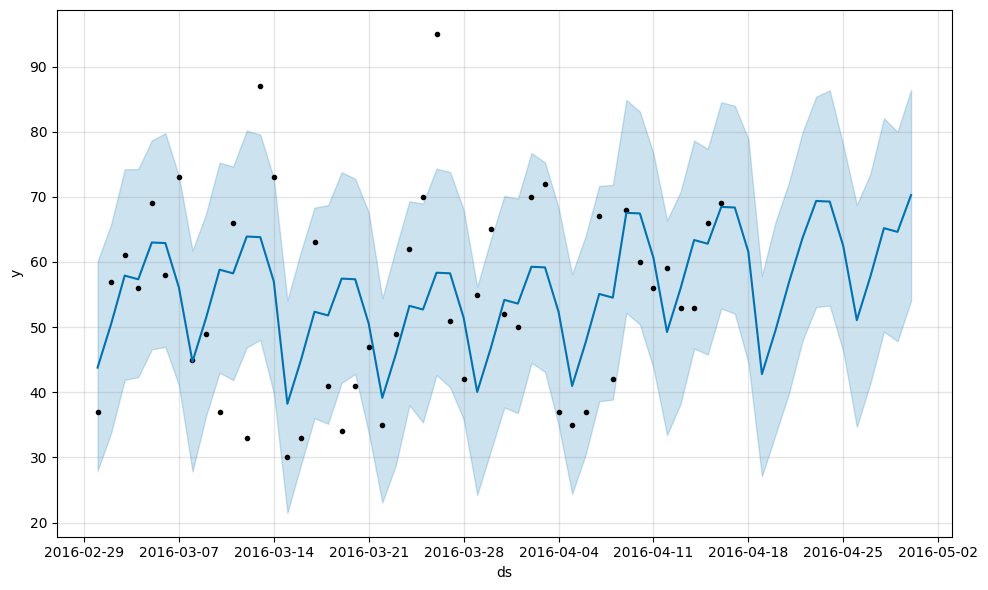

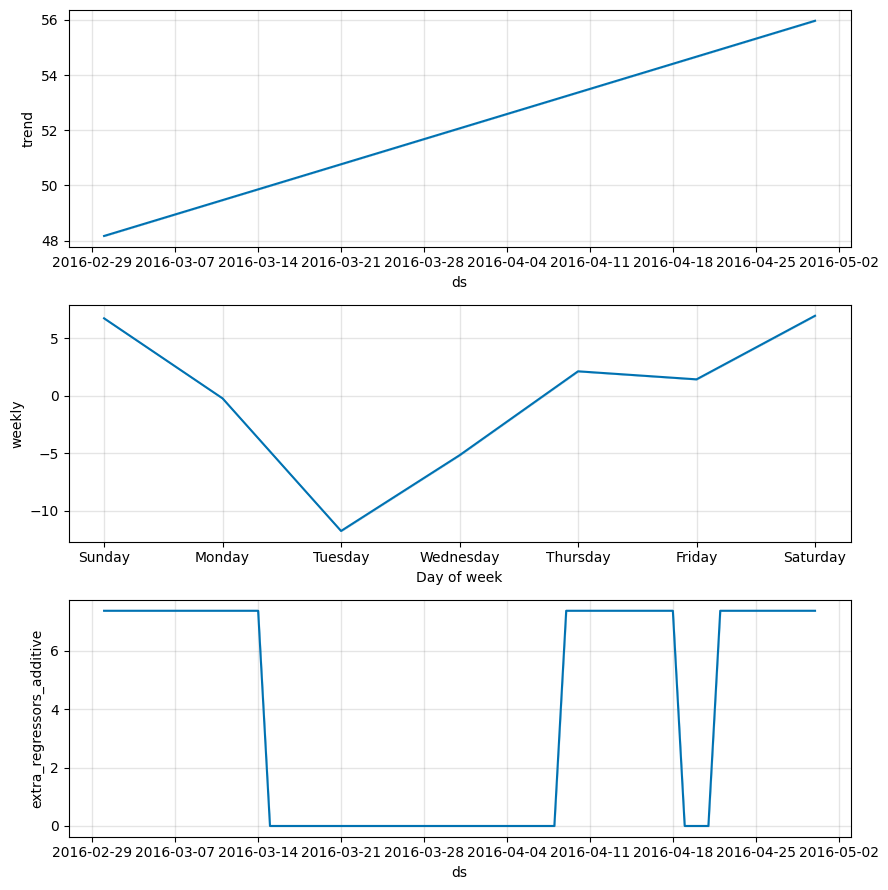

In [67]:
model = Prophet()
model.add_regressor('Action')
model.fit(daily_sales[:-14])

future = model.make_future_dataframe(periods=14)
future['Action'] = daily_sales['Action']

forecast = model.predict(future)

model.plot(forecast)
model.plot_components(forecast)
cmp_df = forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(daily_sales.set_index('ds'))
cmp_df

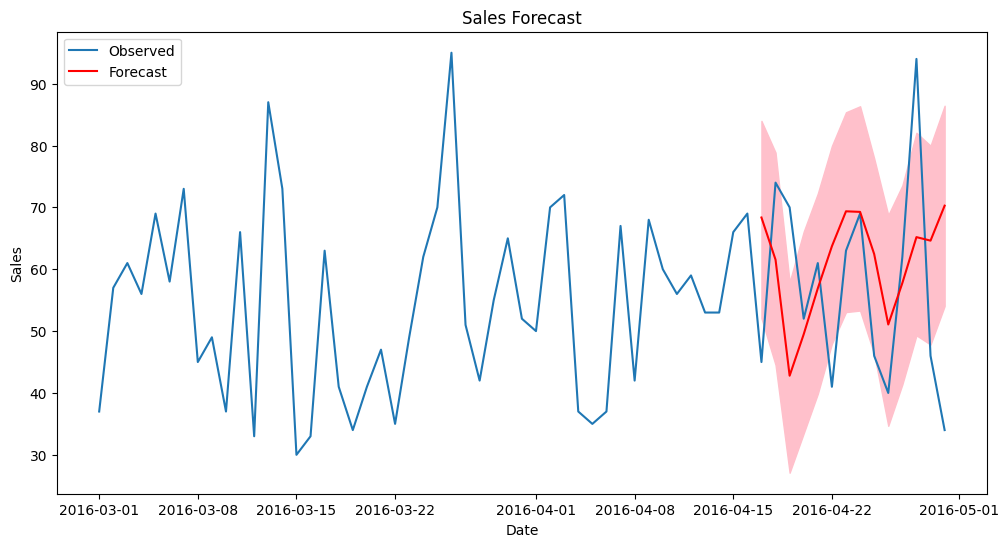

MAPE: 20.321002220500105


In [68]:
# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(cmp_df[['y']], label='Observed')
plt.plot(cmp_df[['yhat']][-14:], label='Forecast', color='red')
plt.fill_between(cmp_df[-14:].index, cmp_df['yhat_lower'][-14:], cmp_df['yhat_upper'][-14:], color='pink')
plt.title("Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

mape = mean_absolute_percentage_error(cmp_df['y'][:-14], cmp_df['yhat'][:-14]) * 100.0
print(f'MAPE: {mape}')